# NB: Introducting Pandas

Programming for Data Science

## What is Pandas?

<img src="assets/pandas-logo-1024x414.png" style="height:120px;float:right;"/>

Pandas is a Python library designed to work with **dataframes**.

Essentially, it **adds a ton of usability features to NumPy**.

It has become **a standard library** in data science.

## Why Pandas?

Since we already have NumPy as a powerful analytical tool to work with data, why do we need Pandas?

Recall one of the problems we faced when using NumPy &mdash; if we want to work with **labeled data**, say a matrix with named columns and rows, we have to create **separate arrays** and manage the relationship between the three arrays **in our heads**.

It would be nice if we could have an object which **contained all three** together.

This is one the things Panda offers.

## Structured Arrays

In fairness, NumPy does offer a partial solution to this problem &mdash; **structured arrays** &mdash; which we have not covered.

Structured arrays allow you to create arrays with **labeled columns**, and these columns may have **different data types**.

For example, here is a simple structured array:

In [1]:
import numpy as np

my_data = [('Rex', 9, 81.), ('Fido', 3, 27.), ('Pluto', 4, 55.)]
my_struct = np.array(
    my_data,
    dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')]
)
my_struct

array([('Rex', 9, 81.), ('Fido', 3, 27.), ('Pluto', 4, 55.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [2]:
my_struct['name'] # Gets a column

array(['Rex', 'Fido', 'Pluto'], dtype='<U10')

In [3]:
my_struct[my_struct['name'] == 'Pluto'] # Gets a row

array([('Pluto', 4, 55.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

However, NumPy's documentation has this warning:

> Users looking to manipulate tabular data, such as stored in csv files, may find other pydata projects more suitable, such as xarray, pandas, or DataArray. These provide a high-level interface for tabular data analysis and are better optimized for that use. For instance, the C-struct-like memory layout of structured arrays in numpy can lead to poor cache behavior in comparison. \
[NumPy documentation](https://numpy.org/doc/1.26/user/basics.rec.html)

## Pandas Data Structures

In a way, Pandas takes the concept of the structured array and runs with it (although the two were developed independently).

In doing so, it makes a strong **design decision** to only work with $1$ and $2$ dimensional arrays:

- A $1$-dimensional labeled array capable of holding any data type is called a **Series**.

- A $2$-dimensional labeled array with columns of potentially different types is called a **DataFrame**.

----

As a side note, Pandas used to have a $3$-dimensional structure called a **panel**, but it has been removed from the library for lack of use.
    
Ironically, the name "pandas" was partly derived the word "panel", as in "$pan(el)-da(ta)-s$".
    
To handle higher dimensional data, the Pandas team suggests using [XArray](https://xarray.pydata.org/en/stable/), which also builds on NumPy arrays.

This is important &mdash; this decision reflects the fact that **data science**, to a large extent, is practiced in **two-dimensional dataspace**.

----

## Data Structure Design

Let's look at how DataFrame and Series objects are **designed and built**.

It is essential to develop a **mental model** of what you are working with so operations and functions associated with them make sense.

Remember &mdash; _data structure design is king_.

## The Series

A Series is at heart a **one-dimensional array** with **labels** along its axis.

**Labels** are essentially names that, ideally, uniquely identify each row (observation).

Its data must be of a **single type**, like NumPy arrays (which they are internally).

<img src="assets/anatomy-of-a-series.png" />

## The Index

The **axis labels** of a Series are referred to as the **index** of the Series.

Think of **the index as a separate data structure** that is attached to the array. 

The Series **array** holds the **data**. 

The Series **index** holds the names of the observations or things that the data are about.

Some consider the index to be **metadata** &mdash; data about data.

Note that if an index does not have labels provided, it falls back on the numeric sequence, like a list.

## The Data Frame

You can think of a DataFrame as **a bundle of Series objects that share an index**.

**Column labels** (also called the column index) can be thought of as **Series names**.

<img src="assets/anatomy-of-a-dataframe.png"/>

Here's a more detailed illustration from [PYnative 2023](https://pynative.com/python-pandas-dataframe/):

<img src="https://pynative.com/wp-content/uploads/2021/02/dataframe.png" width="50%" height="50%"/>

And finally here is a nice visualization from [Nantasenamat 2021](https://towardsdatascience.com/how-to-master-pandas-for-data-science-b8ab0a9b1042):

<img src="assets/anatomy-of-pandas-data-structures.jpg" width="40%"/>

Let's dive into how Pandas objects work in practice.

## Using Pandas

We import pandas like this, using the alias `pd` by convention:

In [4]:
import pandas as pd

We almost always import NumPy, too, since we use many of its functions and properties with Pandas.

In [5]:
import numpy as np

## Versions

Note that as of June 2024, NumPy 2.0 has been released, its first major release since 2006.

This notebook uses an earlier version. 

To find out the version of library you are using, you can inspect its `.__version__` property.

In [6]:
np.__version__

'1.24.4'

With respect to Pandas, we are using version 2.0 here.

In [7]:
pd.__version__

'2.0.3'

## Series Constructors

To create a Series, you can pass it most any sequence of values.

Here, we use one of NumPy's random number generators.

In [8]:
randos = pd.Series(np.random.randn(10))
randos

0   -0.626095
1    1.039775
2   -0.943228
3   -0.785196
4    1.101974
5    2.083032
6    1.141408
7    0.461128
8    0.510737
9    0.530833
dtype: float64

Here we pass a list, and also add an index of labels.

Not also we can give the Series a name and set a data type.

In [9]:
my_series = pd.Series(
    [3, -5, 7, 4], 
    index=['a', 'b', 'c',  'd'],
    name='feature1',
    dtype=np.int8
)
my_series

a    3
b   -5
c    7
d    4
Name: feature1, dtype: int8

So, now we can access data by label.

In [10]:
my_series['a']

3

Note that although the integer offsets are not shown, they are still there:

In [69]:
my_series[1]

-5

## Series Properties and Methods

As an object, a Series has properties.

In [11]:
my_series.name, randos.name

('feature1', None)

In [12]:
my_series.shape, randos.shape

((4,), (10,))

In [13]:
my_series.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Here are a sample of methods.

In [14]:
randos.head() # Get the first five items

0   -0.626095
1    1.039775
2   -0.943228
3   -0.785196
4    1.101974
dtype: float64

In [15]:
randos.describe() # Computes basic stats

count    10.000000
mean      0.451437
std       0.974842
min      -0.943228
25%      -0.354289
50%       0.520785
75%       1.086424
max       2.083032
dtype: float64

In [16]:
randos.sum() # Sums up all the values

4.514367728388432

You can even generate a plot very quickly.

NumPy combines the functionality of NumPy with Matplotlib.

<Axes: >

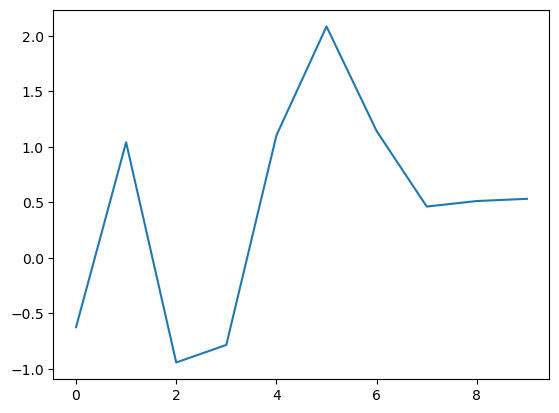

In [17]:
randos.plot() # Generates a Matplotlib graph

## Data Frame Constructors

There are several ways to create Pandas DataFrames.

Here, we create one by passing a dictionary of lists:

In [18]:
df = pd.DataFrame({
    'x': [0, 2, 1, 5], 
    'y': [1, 1, 0, 0], 
    'z': [True, False, False, False]
})
df

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


Note how Jupyter provides a **pleasing representation** of the DataFrame, using bold to signify the index labels along both axes.

Here are some properties of DataFrames:

In [19]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [20]:
list(df.index) # We can covert the index object into a list

[0, 1, 2, 3]

In [21]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

In [22]:
list(df.columns) # Same with columns

['x', 'y', 'z']

In [23]:
df.values # The data themselves

array([[0, 1, True],
       [2, 1, False],
       [1, 0, False],
       [5, 0, False]], dtype=object)

In [24]:
type(df.values) # Note that this is a NumPy array

numpy.ndarray

Another way to construct a DataFrame is to pass the constructor a list of tuples (or lists).

Here we also define the column names.

In [25]:
my_data = [
    ('a', 1, True),
    ('b', 2, False),
    ('c', 4, True)
]
df2 = pd.DataFrame(my_data, columns=['f1', 'f2', 'f3'])
df2

,f1,f2,f3
0,a,1,True
1,b,2,False
2,c,4,True


We can also pass an index of labels.

In [26]:
df3 = pd.DataFrame(
    columns=['x','y'], 
    index=['A','B','C'], 
    data=[[9,3],[1,2],[4,6]])
df3

,x,y
A,9,3
B,1,2
C,4,6


## Naming indexes

Indexes are important in Pandas.

It is helpful to name them.

One way to do this is to assign the `.index.name` property after construction.

In [27]:
df2.index.name = 'obs_id'
df2

,f1,f2,f3
obs_id,,,
0,a,1,True
1,b,2,False
2,c,4,True


Note how Jupyter represents the index name separately from the column names.

## Why have an index?

Indexes provide a way to **access** elements of the array **by name**.

They also allow series and data frame objects that share index labels to be **combined**, through joins and other data operations.

They allow for all kinds of **magic** to take place when combining and accessing data.

But they are **expensive** and sometimes hard to work with.

They are especially difficult if you are **coming from R** and expecting dataframes to behave a certain way.

In any case, an understanding of them is **crucial** for the effective use of Pandas.

To repeat the point made earlier, **a DataFrame is a collection of Series** objects with a common index. 

To this collection of series, the dataframe also adds a labeled index along the horizontal axis.

The row index is usually just called the index, while the column index is just called the columns.

**It is crucial to understand the difference between the index of a dataframe and its data in order to understand how dataframes work.**

Many a headache is caused by not understanding this difference :-)

## Multidimensional Indexes

Note that both index and column labels can be **multidimensional**.

These are called **Hierarchical Indexes** and go the technical name of `MultiIndexes`.

As an example, consider the following table of sentences in a novel:

In [28]:
books = pd.DataFrame({
    'book_id': [105, 105, 105, 105, 105, 105],
    'chap_id': [1, 1, 1, 1, 1, 1],
    'para_id': [1, 1, 1, 1, 1, 1],
    'sent_id': [1, 2, 3, 4, 5, 6],
    'content': [
        "Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who, for his own amusement, never took up any book but the Baronetage; ", 
        "there he found occupation for an idle hour, and consolation in a distressed one; ", 
        "there his faculties were roused into admiration and respect, by contemplating the limited remnant of the earliest patents; ",
        "there any unwelcome sensations, arising from domestic affairs changed naturally into pity and contempt as he turned over the almost endless creations of the last century; ",
        "and there, if every other leaf were powerless, he could read his own history with an interest which never failed. ",
        "This was the page at which the favourite volume always opened:"]
})
books

,book_id,chap_id,para_id,sent_id,content
0,105,1,1,1,"Sir Walter Elliot, of Kellynch Hall, in Somers..."
1,105,1,1,2,"there he found occupation for an idle hour, an..."
2,105,1,1,3,there his faculties were roused into admiratio...
3,105,1,1,4,"there any unwelcome sensations, arising from d..."
4,105,1,1,5,"and there, if every other leaf were powerless,..."
5,105,1,1,6,This was the page at which the favourite volum...


Here we use `.set_index()` to convert some columns to index names.

In [29]:
books = books.set_index(list(books.columns[:4]))
books.head()

content
book_id chap_id para_id sent_id                                                   
105     1       1       1        Sir Walter Elliot, of Kellynch Hall, in Somers...
                        2        there he found occupation for an idle hour, an...
                        3        there his faculties were roused into admiratio...
                        4        there any unwelcome sensations, arising from d...
                        5        and there, if every other leaf were powerless,...

## Copying DataFrames

As with NumPy arrays, you need to pay attention to the difference between a **view** and **copy**.

Use `.copy()` to give the new `df` a clean break from the original.  

Otherwise, the copied `df` will point to the same object as the original.

Here is an example.

In [30]:
df = pd.DataFrame(
    {
        'x':[0,2,1,5], 
        'y':[1,1,0,0], 
        'z':[True,False,False,False]
    }
) 

In [31]:
df

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


We create two copies, one "deep" and one "shallow".

In [32]:
df_deep    = df.copy()  # deep copy; changes to df will not pass through
df_shallow = df         # shallow copy; changes to df will pass through

If we alter a value in the original ...

In [33]:
df.x = 1

In [34]:
df

,x,y,z
0,1,1,True
1,1,1,False
2,1,0,False
3,1,0,False


... then the shallow copy is also changed ...

In [35]:
df_shallow

,x,y,z
0,1,1,True
1,1,1,False
2,1,0,False
3,1,0,False


... while the deep copy is not.

In [36]:
df_deep

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


Of course, the reverse is true too &mdash; changes to the shallow copy affect the original:

In [37]:
df_shallow.y = 99

In [38]:
df

,x,y,z
0,1,99,True
1,1,99,False
2,1,99,False
3,1,99,False


So, `df_shallow` mirrors changes to `df`, since it references its indices and data.  
`df_deep` does not reference `df`, and so changes `to` df do not impact `df_deep`.

## Column Data Types

You can access the data types of the columns in a couple of ways.

In [39]:
df = pd.DataFrame({'x':[0,2,1,5], 'y':[1,1,0,0], 'z':[True,False,False,False]}) 
df

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


In [40]:
df.dtypes # Show the datatypes of the columns 

x    int64
y    int64
z     bool
dtype: object

In [41]:
df.info() # Show more detailed information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       4 non-null      int64
 1   y       4 non-null      int64
 2   z       4 non-null      bool 
dtypes: bool(1), int64(2)
memory usage: 200.0 bytes


## Column Renaming

You can rename one or more fields at once using a dictionary.  

Here, we rename the field `z` to `is_label`:

In [42]:
df = df.rename(columns={'z': 'is_label'})

In [43]:
df

,x,y,is_label
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


You can also change column names by just reassigning the columns property:

In [44]:
old_cols = df.columns # Keep a copy so we can revert
df.columns = ['X','Y', 'LABEL']

In [45]:
df

,X,Y,LABEL
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


In [46]:
df.columns = old_cols # Reset things

In [47]:
df

,x,y,is_label
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


You can also transform column named easily:

In [48]:
df3

,x,y
A,9,3
B,1,2
C,4,6


In [49]:
df3.columns = df3.columns.str.upper()

In [50]:
df3

,X,Y
A,9,3
B,1,2
C,4,6


## Column Referencing

Pandas supports both **bracket notation** and **dot notation** to access column data.  

This is bracket notation:

In [51]:
df['y']

0    1
1    1
2    0
3    0
Name: y, dtype: int64

And this is dot `.` notation:

In [52]:
df.y

0    1
1    1
2    0
3    0
Name: y, dtype: int64

Dot notation is very convenient, since as object attributes they can be tab-completed in various editing environments.

But it only works if the column names are **not reserved words**.

And it can't be used when creating a **new column** (see below).

It is convenient to names columns with a prefix, e.g. `doc_title`, `doc_year`, `doc_author`, etc. to avoid name collisions.

Column attributes and methods work with both:

In [53]:
df.y.values, df['y'].values

(array([1, 1, 0, 0]), array([1, 1, 0, 0]))

Here we get the first element of a column by indexing:

In [54]:
df.y.values[0]

1

## Column Selection

You select columns from a dataframe by passing a value or list (or any expression that evaluates to a list).

Calling a columns with a scalar returns a Series:

In [55]:
df['x']

0    0
1    2
2    1
3    5
Name: x, dtype: int64

In [56]:
type(df['x'])

pandas.core.series.Series

But calling a column with a list returns a dataframe:

In [57]:
df[['x']]

,x
0,0
1,2
2,1
3,5


In [58]:
type(df[['x']])

pandas.core.frame.DataFrame

We saw this in discussing the difference between vectors ($1$-D arrays) and $2$-D arrays with one column or row.

We also saw how accessing array data by integer or slice affected the return value.

In Pandas, we can use "fancy indexing" with labels:

In [59]:
df[['y', 'x']]

,y,x
0,1,0
1,1,2
2,0,1
3,0,5


We can put in a list comprehension, too:

In [60]:
df[[col for col in df.columns if col not in ['x','y']]]

,is_label
0,True
1,False
2,False
3,False


## Adding New Columns

It is typical to create a new column from existing columns.  

In this example, a new column is created by summing `x` and `y`:

In [61]:
df['x_plus_y'] = df.x + df.y

In [62]:
df

,x,y,is_label,x_plus_y
0,0,1,True,1
1,2,1,False,3
2,1,0,False,1
3,5,0,False,5


Note the use of bracket notation on the left.

When new columns are created, you **must** use bracket notation.

## Removing Columns

`del()` can be used to delete any object in Python.

`del` does the same thing.

`del()` can drop a DataFrame or single columns from the frame

In [63]:
df_drop = df.copy()

In [64]:
df_drop.head(2)

,x,y,is_label,x_plus_y
0,0,1,True,1
1,2,1,False,3


In [65]:
del(df_drop['x'])

In [66]:
df_drop

,y,is_label,x_plus_y
0,1,True,1
1,1,False,3
2,0,False,1
3,0,False,5


`.drop()` can drop one or more columns.

This takes the `axis` parameter, where 

- `axis=0` refers to rows 
- and `axis=1` refers to columns. 

In [67]:
df_drop = df_drop.drop(['x_plus_y', 'is_label'], axis=1)

In [68]:
df_drop

,y
0,1
1,1
2,0
3,0
